<a href="https://colab.research.google.com/github/l-e13/labs/blob/main/04_hedonic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



## 1. Clean the data and perform some EDA and visualization to get to know the data set.

In [ ]:
! git clone https://github.com/l-e13/labs

Cloning into 'labs'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 133 (delta 58), reused 50 (delta 28), pack-reused 39 (from 1)
Receiving objects: 100% (133/133), 20.77 MiB | 8.04 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [ ]:
import pandas as pd
airbnb = pd.read_csv("/content/labs/04_hedonic_pricing/airbnb_hw.csv")
airbnb.head()
airbnb.dtypes

,0
Host Id,int64
Host Since,object
Name,object
Neighbourhood,object
Property Type,object
Review Scores Rating (bin),float64
Room Type,object
Zipcode,float64
Beds,float64
Number of Records,int64


In [ ]:
# convert price to numeric
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors = "coerce")
airbnb.dtypes

,0
Host Id,int64
Host Since,object
Name,object
Neighbourhood,object
Property Type,object
Review Scores Rating (bin),float64
Room Type,object
Zipcode,float64
Beds,float64
Number of Records,int64


In [ ]:
airbnb.isnull().sum()

,0
Host Id,0
Host Since,3
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8323
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


In [ ]:
# handling missing values

# used this for help: https://www.geeksforgeeks.org/how-to-drop-rows-with-nan-values-in-pandas-dataframe/
airbnb = airbnb.dropna(subset=['Host Since']) # get rid of the 3 missing rows
airbnb = airbnb.dropna(subset=['Property Type'])
airbnb = airbnb.dropna(subset=['Price'])
airbnb['Beds'].fillna(airbnb['Beds'].median(), inplace=True) # filling with median if NaN
airbnb['Review Scores Rating'] = airbnb['Review Scores Rating'].fillna('No Review')
airbnb['Review Scores Rating (bin)'] = airbnb['Review Scores Rating (bin)'].fillna('No Review')
airbnb.isnull().sum()

<ipython-input-5-f91fd17e5914>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb['Beds'].fillna(airbnb['Beds'].median(), inplace=True) # filling with median if NaN


,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,0
Review Scores Rating (bin),0
Room Type,0
Zipcode,134
Beds,0
Number of Records,0


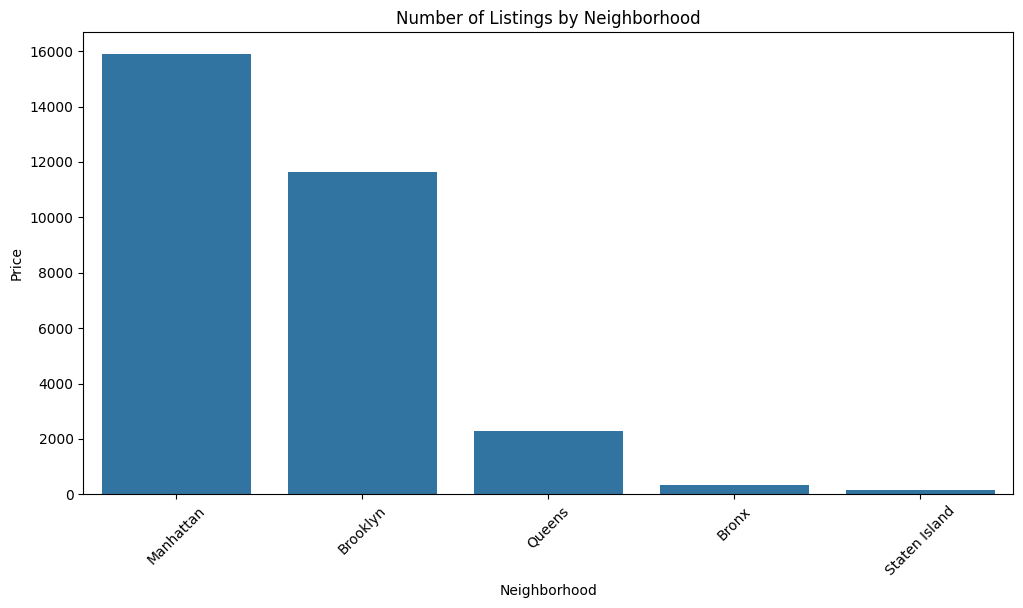

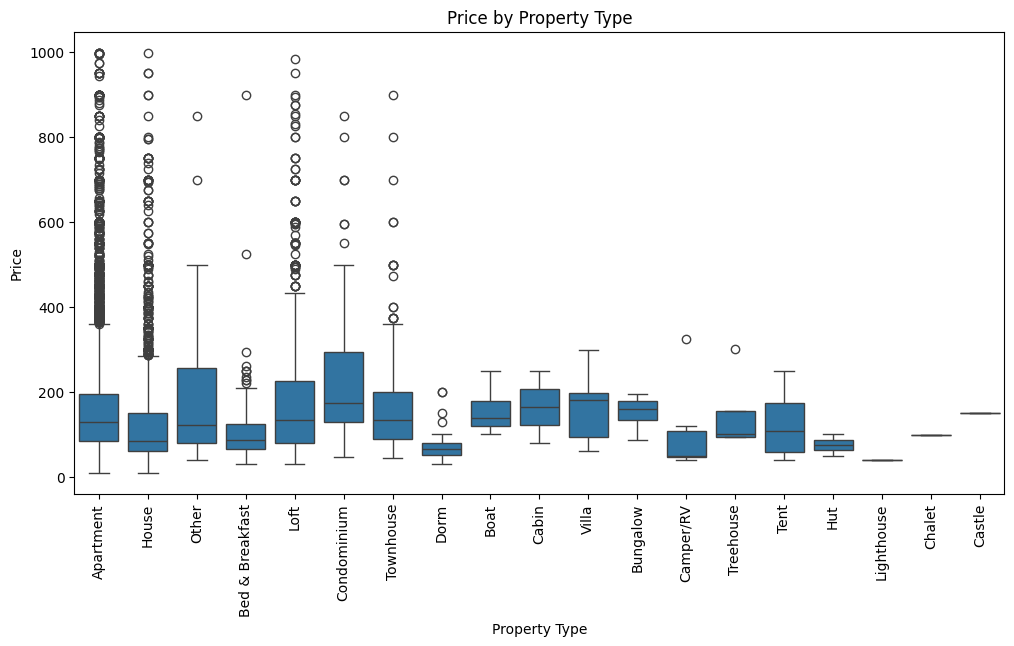

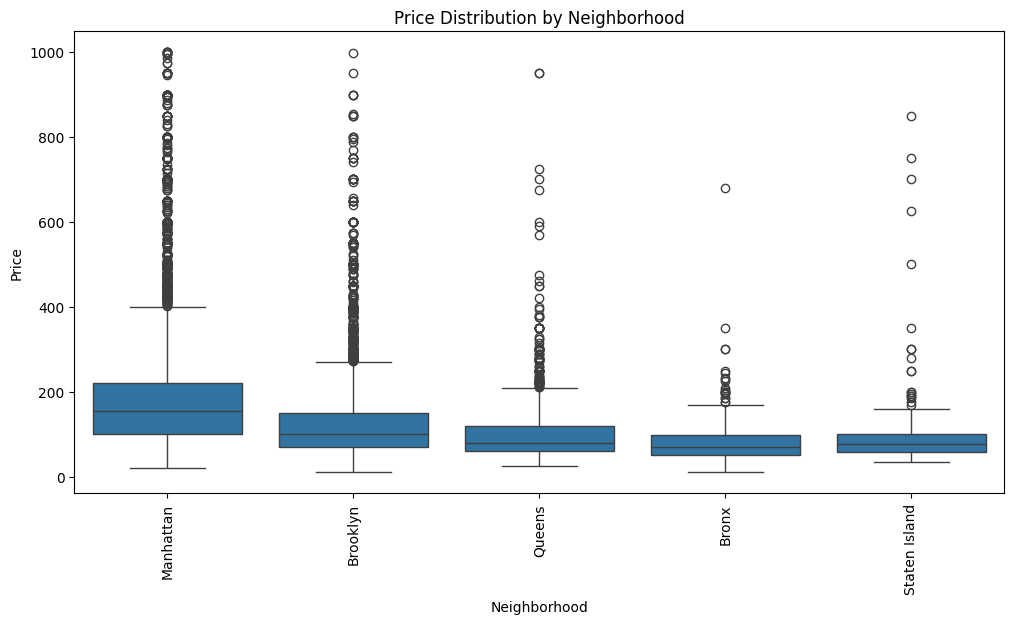

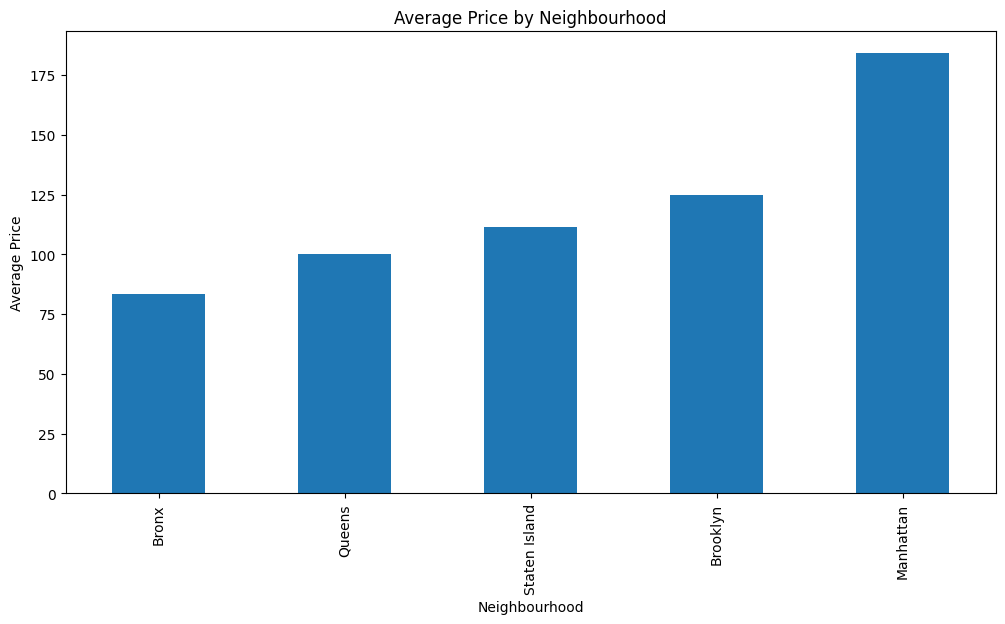

In [ ]:
# EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='Neighbourhood ', data = airbnb)
plt.xticks(rotation=45)
plt.title('Number of Listings by Neighborhood')
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x = 'Property Type', y = 'Price', data = airbnb)
plt.xticks(rotation=90)
plt.title('Price by Property Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data = airbnb, x = 'Neighbourhood ', y = 'Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()


average_price = airbnb.groupby('Neighbourhood ')['Price'].mean().sort_values()
plt.figure(figsize=(12, 6))
average_price.plot(kind='bar')
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

## 2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [ ]:
import pandas as pd

y = airbnb["Price"]
X = pd.get_dummies(airbnb[["Neighbourhood ", "Review Scores Rating", "Property Type", "Room Type"]], dtype = "int", drop_first = True)


## 3. Implement an 80/20 train-test split. Put the test data aside.

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)


## 4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and  𝑅2  on the both the training and test sets. Which of your models does the best?

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# used linear regression notes

airbnb.columns = airbnb.columns.str.strip() # get rid of extra space at end of neighbourhood

y = airbnb['Price']
X = airbnb[['Beds', 'Neighbourhood']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
Z_train = pd.concat([X_train[['Beds']],
    pd.get_dummies(X_train['Neighbourhood'], drop_first=True)], axis=1)

Z_test = pd.concat([
    X_test[['Beds']],
    pd.get_dummies(X_test['Neighbourhood'], drop_first=True)], axis=1)


reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)
y_hat = reg.predict(Z_test)
print('R²: ', reg.score(Z_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable': reg.feature_names_in_, 'coefficient': reg.coef_})
results


R²:  0.27286539134477983
RMSE:  93.92990697521023


,variable,coefficient
0,Beds,47.690406
1,Brooklyn,50.908988
2,Manhattan,112.318274
3,Queens,27.175165
4,Staten Island,10.885557


For each additional bed, the price increases by $47.69 if the other variables stay constant. Manhattan has the highest increase out of the neighborhoods.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


airbnb.columns = airbnb.columns.str.strip()

y = airbnb['Price']
X = airbnb[['Beds', 'Room Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
Z_train = pd.concat([
    X_train[['Beds']],
    pd.get_dummies(X_train['Room Type'], drop_first=True)], axis=1)

Z_test = pd.concat([
    X_test[['Beds']],
    pd.get_dummies(X_test['Room Type'], drop_first=True)], axis=1)


Z_test = Z_test.reindex(columns=Z_train.columns, fill_value=0)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)
y_hat = reg.predict(Z_test)
r_squared = reg.score(Z_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print('R²: ', r_squared)
print('RMSE: ', rmse)
results = pd.DataFrame({'variable': reg.feature_names_in_, 'coefficient': reg.coef_})
results


R²:  0.017784362399917653
RMSE:  109.1691443531879


,variable,coefficient
0,Beds,86.140004
1,Private room,-8.328063
2,Shared room,-37.528469


## 5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and  𝑅2  on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

airbnb.columns = airbnb.columns.str.strip()
y = airbnb['Price']
X = airbnb[['Beds', 'Room Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
Z_train = pd.concat([
    X_train[['Beds']],
    pd.get_dummies(X_train['Room Type'], drop_first=True)], axis=1)

Z_test = pd.concat([
    X_test[['Beds']],
    pd.get_dummies(X_test['Room Type'], drop_first=True)], axis=1)

expander = PolynomialFeatures(degree=2, include_bias=False)
Z_train_poly = expander.fit_transform(Z_train)
Z_test_poly = expander.transform(Z_test)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train_poly, y_train)
y_hat = reg.predict(Z_test_poly)

r_squared = reg.score(Z_test_poly, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print('Test R²: ', r_squared)
print('Test RMSE: ', rmse)

results = pd.DataFrame({'variable': expander.get_feature_names_out(input_features=Z_train.columns), 'coefficient': reg.coef_})
print(results)


Test R²:  0.23689508500112078
Test RMSE:  96.22515286914442
                   variable  coefficient
0                      Beds   123.761649
1              Private room    20.516025
2               Shared room    17.134675
3                    Beds^2    -8.774041
4         Beds Private room   -68.835280
5          Beds Shared room   -75.102167
6            Private room^2    20.516025
7  Private room Shared room     0.000000
8             Shared room^2    17.134675


The complex model performs worse than the simpler model. The complex model r^2 is .24 and the simpler model with beds and neighborhood r^2 is .27. This shows how complexity doesn't make it a better model. Simpler models have less overfitting.

## 6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

The complex model had more overfitting. There was more noise in this model. Models with single variables underfit. This shows that not having enough variables can cause errors. From this, I learned that simpler models are often better than complex models. You don't need to cram in a lot of variables because this usually leads to overfitting.